# Preface 



A. The dataset contains 8 clases. 
(10, 20, 50, 100, 200, 500, 2000, Background) 

B. You can Download the dataset from Kaggle directly to the notebook, for that you have to download the Json file from your kaggle account and upload in the Notebook.
(https://www.kaggle.com/general/74235)

C. The final dataset is uploaded on the drive and the link is shared also

#Link 1: https://www.kaggle.com/vishalmane109/indian-currency-note-images-dataset-2020

#Link 2: https://www.kaggle.com/shobhit18th/indian-currency-notes

##Final Dataset Link: https://drive.google.com/drive/folders/1LLY_J0YRUGrUGX148mxOuwUQupvqWj2m?usp=sharing

Import the Libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Import the dataset

In [ ]:
!gdown --id https://www.kaggle.com/vishalmane109/indian-currency-note-images-dataset-2020/download

Permission denied: https://drive.google.com/uc?id=https://www.kaggle.com/vishalmane109/indian-currency-note-images-dataset-2020/download
Maybe you need to change permission over 'Anyone with the link'?


Initialise Kaggle 

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download Dataset from Kaggle

In [ ]:
!kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020

 99% 2.30G/2.31G [00:26<00:00, 98.1MB/s]
100% 2.31G/2.31G [00:26<00:00, 93.7MB/s]


Unzip

In [ ]:
!unzip /content/indian-currency-note-images-dataset-2020.zip


Archive:  /content/indian-currency-note-images-dataset-2020.zip
  inflating: Indian currency dataset v1/test/100_15.jpg  
  inflating: Indian currency dataset v1/test/100_20.jpg  
  inflating: Indian currency dataset v1/test/100_270.jpg  
  inflating: Indian currency dataset v1/test/100_3.jpg  
  inflating: Indian currency dataset v1/test/100_359.jpg  
  inflating: Indian currency dataset v1/test/100_371.jpg  
  inflating: Indian currency dataset v1/test/100_4.jpg  
  inflating: Indian currency dataset v1/test/100__371.jpg  
  inflating: Indian currency dataset v1/test/100__386.jpg  
  inflating: Indian currency dataset v1/test/100__389.jpg  
  inflating: Indian currency dataset v1/test/100__415.jpg  
  inflating: Indian currency dataset v1/test/100__427.jpg  
  inflating: Indian currency dataset v1/test/100__435.jpg  
  inflating: Indian currency dataset v1/test/100__437.jpg  
  inflating: Indian currency dataset v1/test/10__206.jpg  
  inflating: Indian currency dataset v1/test/10__2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Train Model

A. The Dataset is divided into Train, Test and Validation.

B. We use the Train and Validation to calculate the Accuracy and Losses and the Test to randomly Check Images 

Basic Image generator to train and validate

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/currency/Indian currency dataset v1/training"

train_datagen = ImageDataGenerator( rescale = 1./255,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30)

VALIDATION_DIR = "/content/drive/MyDrive/currency/Indian currency dataset v1/validation"

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                   zoom_range = 0.3,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 30)

train_generator = train_datagen.flow_from_directory(
	TRAINING_DIR,
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	class_mode='categorical',
  batch_size=126
)


Found 6128 images belonging to 8 classes.
Found 345 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import random

In [ ]:
model = InceptionResNetV2(include_top = False,
                          weights = 'imagenet',
                          input_tensor = None,
                          input_shape = (250, 500, 3))






219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
top_layer = model.output
x = GlobalAveragePooling2D()(top_layer)
op = Dense(8, activation = 'softmax', name = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = op)

In [ ]:
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250, 500, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 124, 249, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 124, 249, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 124, 249, 32) 0           batch_normalization[0][0]        
________________________________________________________________________________

In [ ]:
for layer in model_final.layers[:16]:
  layer.trainable = False

for layer in model_final.layers[16:]:
  layer.trainable = True

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint('model_res_net.h5', monitor = 'val_accuracy', verbose = 1,
                             save_best_only = True, save_weights_only = False,
                             mode = 'auto')
early = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 10,
                      verbose = 1, mode = 'auto')

In [ ]:
IMG_SIZE = (250, 500)
NUM_CLASSES = 8
BATCH_SIZE = 6
NUM_EPOCH = 15
FREEZE_LAYERS = 16 
LEARNING_RATE = 0.0002
DROP_OUT = .2

In [ ]:

model_final.compile(optimizer = Adam(lr = LEARNING_RATE),
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [34]:
history=model_final.fit_generator(train_generator,
                          steps_per_epoch = np.ceil(len(train_generator) // BATCH_SIZE),
                          validation_data =  validation_generator,
                          validation_steps = np.ceil(len( validation_generator) // BATCH_SIZE),
                          epochs = 30,
                          callbacks = [checkpoint, early])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
3/8 [==========>...................] - ETA: 57s - loss: 0.0475 - accuracy: 0.9880 

KeyboardInterrupt: ignored

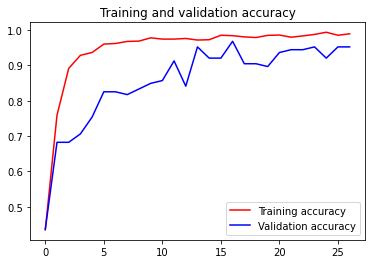

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

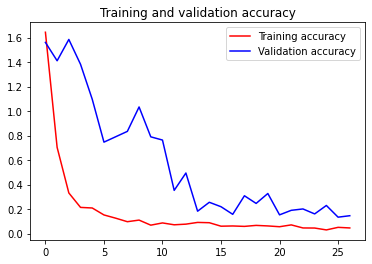

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, loss, 'r', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

#Testing

In [27]:
class_dictionary = train_generator.class_indices
class_dictionary

{'10': 0,
 '100': 1,
 '20': 2,
 '200': 3,
 '2000': 4,
 '50': 5,
 '500': 6,
 'Background': 7}

In [28]:

vals = list(class_dictionary.values())
keys = list(class_dictionary.keys())

In [57]:
test_categories = os.listdir('/content/drive/MyDrive/currency/Indian currency dataset v1/test')
test_categories

['100_15.jpg',
 '100_20.jpg',
 '100_270.jpg',
 '100_3.jpg',
 '100_371.jpg',
 '100_4.jpg',
 '100_359.jpg',
 '100__371.jpg',
 '100__386.jpg',
 '100__415.jpg',
 '100__389.jpg',
 '100__427.jpg',
 '100__435.jpg',
 '100__437.jpg',
 '10__358.jpg',
 '10__324.jpg',
 '10__247.jpg',
 '10__276.jpg',
 '10__206.jpg',
 '200.__1.jpg',
 '10__443.jpg',
 '10__388.jpg',
 '200.__142.jpg',
 '200.__17.jpg',
 '200.__143.jpg',
 '200.__170.jpg',
 '200.__192.jpg',
 '200.__206.jpg',
 '200.__254.jpg',
 '200.__225.jpg',
 '200.__290.jpg',
 '200.__338.jpg',
 '500__114.jpg',
 '200.__87.jpg',
 '20__65.jpg',
 '200.__492.jpg',
 '2000__37.jpg',
 '500__17.jpg',
 '2000__428.jpg',
 '2000__261.jpg',
 '20__449.jpg',
 '20__226.jpg',
 '20__36.jpg',
 '2000__288.jpg',
 '2000__359.jpg',
 '20__415.jpg',
 '20__72.jpg',
 '2000__240.jpg',
 '20__324.jpg',
 '500__233.jpg',
 '500__0.jpg',
 '200.__37.jpg',
 '2000__8.jpg',
 '2000__161.jpg',
 '200.__402.jpg',
 '20__107.jpg',
 '20__136.jpg',
 '20__9.jpg',
 '20__295.jpg',
 '2000__66.jpg',
 '20

In [63]:
test_categories = os.listdir('/content/drive/MyDrive/test_data')
test_categories

['20 (1).jpeg', '20.jpeg', '50 (1).jpeg', '50.jpeg']

In [65]:

for p in test_categories:
  sum_confidence = 0.
  print(f'Predicting on the class {p}')
  for img_name in os.path.join('/content/drive/MyDrive/test_data', p):
      img = image.load_img('/content/drive/MyDrive/test_data' + '/' + p , target_size = IMG_SIZE)
  array = image.img_to_array(img)
  test_image = np.expand_dims(array, axis = 0)
  test_image = preprocess_input(test_image)
  prediction = model_final.predict(test_image)
  idx = np.argmax(prediction, axis = 1)
  confidence = prediction[0, idx] * 100
  digit = keys[vals.index(idx)]
  print(f'Model predict digit {digit} for image {img_name} with confidence {confidence[0]}')
  sum_confidence += confidence
  avg_confidence = sum_confidence / len(os.listdir('/content/drive/MyDrive/test_data'))
  print(f'Average confidence on class {p} is {avg_confidence}')

Predicting on the class 20 (1).jpeg
Model predict digit 20 for image g with confidence 99.862548828125
Average confidence on class 20 (1).jpeg is [24.965637]
Predicting on the class 20.jpeg
Model predict digit 20 for image g with confidence 76.60711669921875
Average confidence on class 20.jpeg is [19.15178]
Predicting on the class 50 (1).jpeg
Model predict digit 50 for image g with confidence 60.1010627746582
Average confidence on class 50 (1).jpeg is [15.025266]
Predicting on the class 50.jpeg
Model predict digit 50 for image g with confidence 98.54557800292969
Average confidence on class 50.jpeg is [24.636395]


In [ ]:

for p in test_categories:
  sum_confidence = 0.
  print(f'Predicting on the class {p}')
  for img_name in os.path.join('/content/drive/MyDrive/currency/Indian currency dataset v1/test', p):
      img = image.load_img('/content/drive/MyDrive/currency/Indian currency dataset v1/test' + '/' + p , target_size = IMG_SIZE)
  array = image.img_to_array(img)
  test_image = np.expand_dims(array, axis = 0)
  test_image = preprocess_input(test_image)
  prediction = model_final.predict(test_image)
  idx = np.argmax(prediction, axis = 1)
  confidence = prediction[0, idx] * 100
  digit = keys[vals.index(idx)]
  print(f'Model predict digit {digit} for image {img_name} with confidence {confidence[0]}')
  sum_confidence += confidence
  avg_confidence = sum_confidence / len(os.listdir('/content/drive/MyDrive/currency/Indian currency dataset v1/test'))
  print(f'Average confidence on class {p} is {avg_confidence}')

# Test on a single Image

Load_the_Model

In [ ]:
model= tf.keras.models.load_model('/content/drive/MyDrive/currency/cnn_model.h5')


In [52]:
model= tf.keras.models.load_model('/content/model_res_net.h5')

In [55]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(250, 500))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)

  print(classes)

Saving WhatsApp Image 2021-08-17 at 11.26.16 AM.jpeg to WhatsApp Image 2021-08-17 at 11.26.16 AM (2).jpeg
[[0. 0. 0. 0. 0. 0. 0. 1.]]
